<a href="https://colab.research.google.com/github/paulojrapuc/TCC/blob/main/Detectar_olho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconhecimento de imagens

## Importando bibliotecas

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt

In [3]:
%cd '/content/drive/MyDrive/tcc/haarcascade'

/content/drive/MyDrive/tcc/haarcascade


## Criando função para detectar rostos

In [4]:
def detecta_rosto(caminhorosto): 
  imagem = cv2.imread(caminhorosto)
  cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
  plt.figure(figsize=(15,15))
  #plt.imshow(cinza, cmap="gray")
  classificador_rostos = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  test = classificador_rostos.load('haarcascade_frontalface_default.xml')
  rostos = classificador_rostos.detectMultiScale(cinza, scaleFactor = 1.5,minNeighbors = 1,minSize=(30,30))
  if rostos is ():
    print("Nenhum rosto encontrado")
    return
  for(x, y, largura, altura) in rostos:
    cv2.rectangle(imagem, (x,y), (x+largura,y+altura), (127,0,255), 2)
  cv2_imshow(imagem)
  cv2.waitKey(0)
      
  cv2.destroyAllWindows()

## Criando função para detectar olhos

In [5]:
def detecta_olhos(caminhoolhos):
  imagem = cv2.imread(caminhoolhos)
  cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
  classificador_olhos = cv2.CascadeClassifier("haarcascade_eye.xml")
  olhos = classificador_olhos.detectMultiScale(cinza, 1.3, 5)
  if olhos is():
    print("Nenhum olho encontrado")
    return
  for(x, y, largura, altura) in olhos:
      cv2.rectangle(imagem, (x,y), (x+largura,y+altura), (127,0,255), 2)
  cv2_imshow(imagem)
  cv2.waitKey(0)
  cv2.destroyAllWindows

  imagemolho = imagem[y:y+altura,x:x+largura]
  cv2_imshow(imagemolho)
  imagemolhocinza = cv2.cvtColor(imagemolho, cv2.COLOR_BGR2GRAY)
  plt.imshow(imagemolhocinza, cmap ="gray")

# Testes com imagens em diferentes posições

In [6]:
%cd '/content/drive/MyDrive/tcc/haarcascade'

/content/drive/MyDrive/tcc/haarcascade


## Olhos abertos


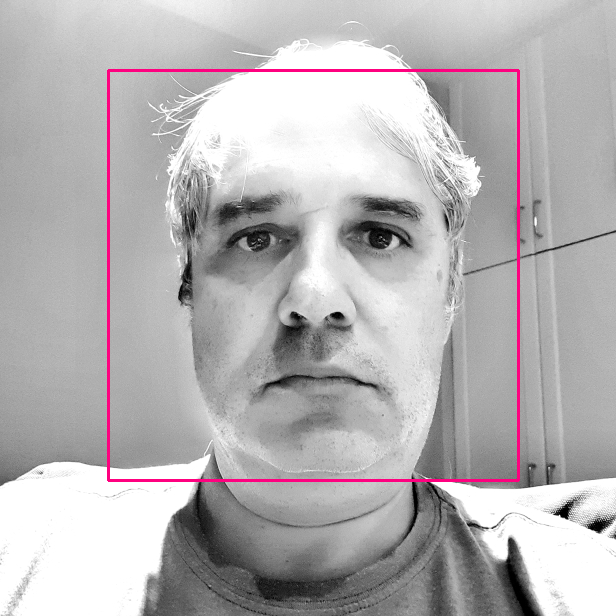

<Figure size 1080x1080 with 0 Axes>

In [7]:
detecta_rosto("Rosto.jpg")

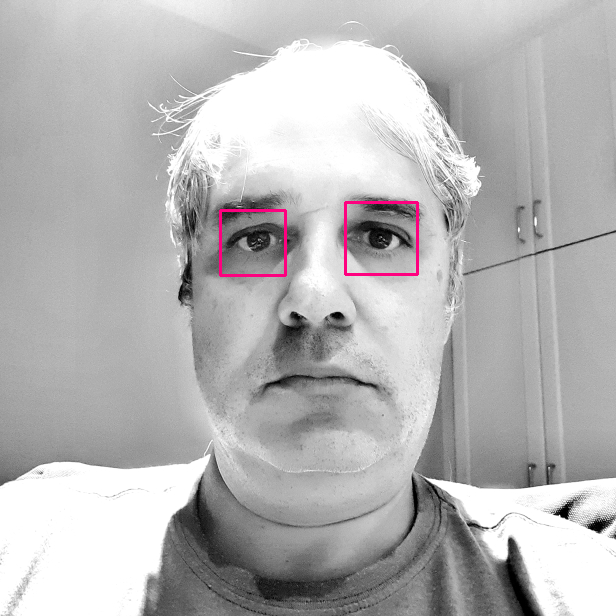

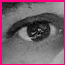

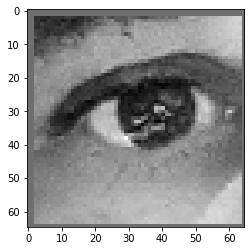

In [8]:
detecta_olhos("Rosto.jpg")

## Olhos semifechados

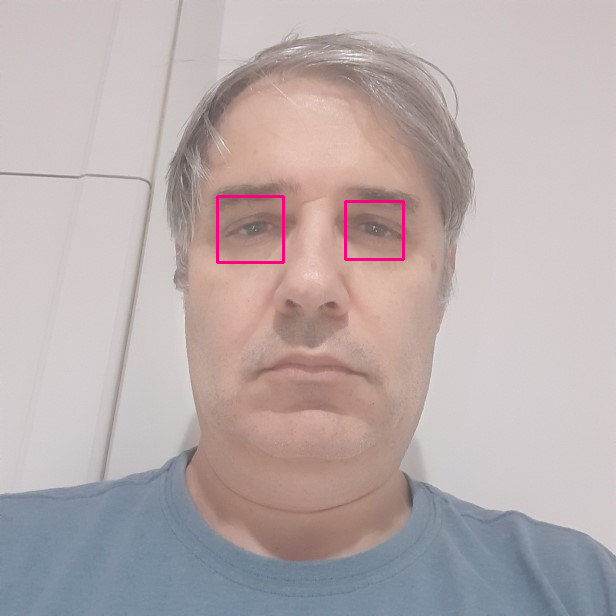

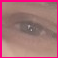

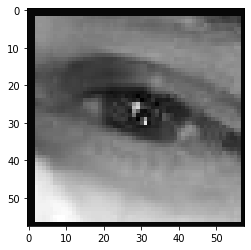

In [9]:
detecta_olhos("Semicerrados.jpg")

## Olhos abertos e fechados

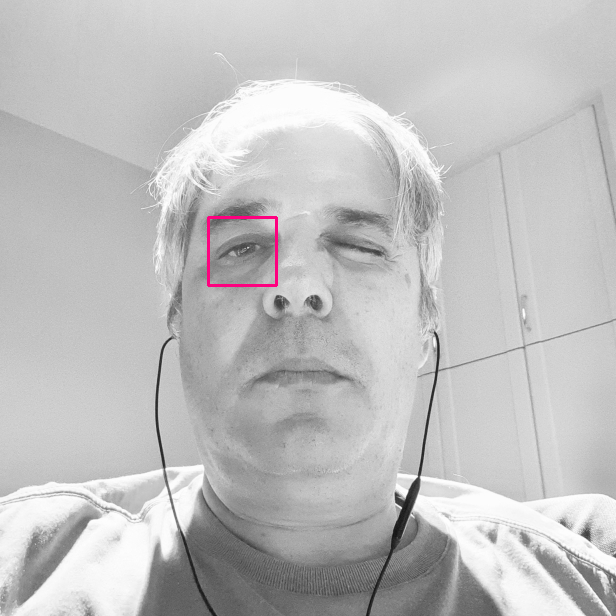

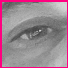

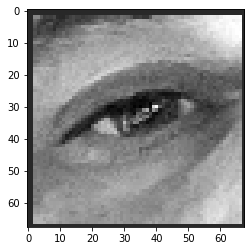

In [10]:
detecta_olhos("esquerdoAberto.jpg")

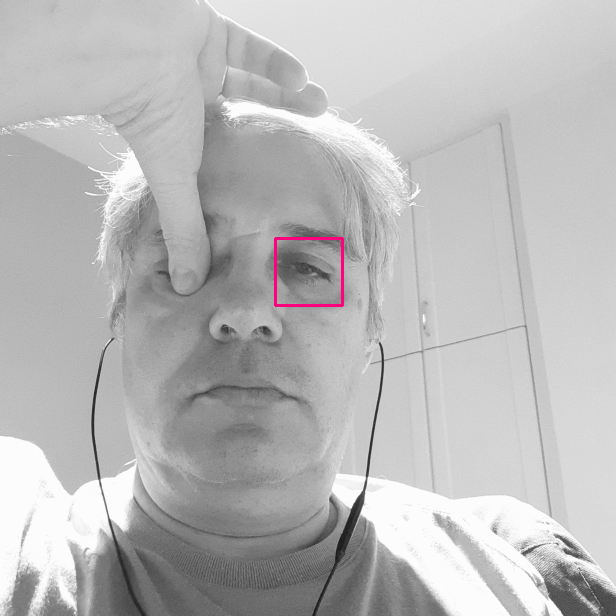

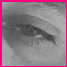

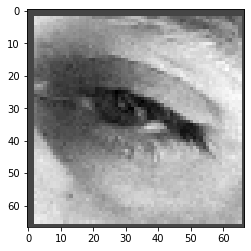

In [11]:
detecta_olhos("direitoFechado.jpg")